<a href="https://colab.research.google.com/github/thaithong2911/NhapMonPhanTichDuLieuVaHocSau/blob/main/Lab05/Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5

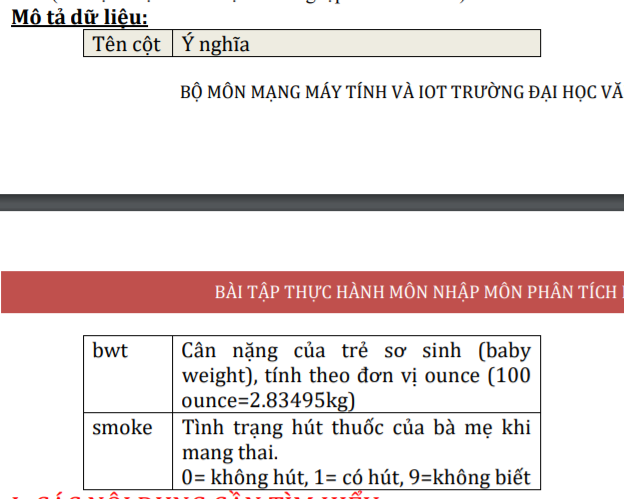

# I. CÁC NỘI DUNG CẦN TÌM HIỂU:


Để thực hiện được lab này, sinh viên cần vận dụng các kiến thức ở các lab trên vào bài toán cụ thể:

1) Ước lượng độ biến động của dữ liệu: Hai yếu tố chính để ước lượng độ biến động của dữ liệu: tâm và đuôi dữ liệu. Qua đó, ta cần tìm hiểu: dữ liệu phân bố như thế nào ở trung tâm (center) và như thế nào ở hai bên đuôi (tail).

Trong dữ liệu một chiều, để đo tính biến động của dữ liệu, ta có thể sử dụng các đại lượng: phương sai (Variance), độ lệch chuẩn (Standard deviation), khoảng cách giữa giá trị lớn nhất và nhỏ nhất (Range) và phần tư vị (IQR-InterQuantile Range). IQR cho phép khảo sát phần tâm dữ liệu trong khoảng từ ¼ cho đến ¾. Đôi khi, để dễ hình dung, người phân tích có thể biểu diễn dữ liệu theo boxplot hay histogram, sẽ minh họa sau.

2) Phân tích về hình dạng của phân phối dữ liệu: Để phân tích hình dạng phân phối dữ liệu, người phân tích cần tính giá trị KURTOSIS, là giá trị để đo độ "bè-nhọn" của đỉnh dữ liệu và giá trị SKEWNESS để đo độ "lệch (trái, phải)" của dữ liệu.

3) Phân tích tính chuẩn: Để phân tích xem dữ liệu có phân phối chuẩn hay không, một cách trực quan, ta biểu diễn theo đường cong chuẩn (normal curve) và đôi khi cần một số thao tác chuẩn hóa.


# II.CÁC NỘI DUNG THỰC HIỆN:

Trong lab này, ta phân tích các dữ liệu quan sát được để trả lời câu hỏi: "Việc bà mẹ hút thuốc khi mang thai có ảnh hưởng đến cân nặng của trẻ sơ sinh hay không?"

Để trả lời câu hỏi trên, cần thực hiện so sánh cân nặng của trẻ sơ sinh trong hai trường hợp: trường hợp bà mẹ hút thuốc khi mang thai và trường hợp bà mẹ không hút thuốc khi mang thai. Sự khác biệt đó có ý nghĩa hay không?

Để so sánh cân nặng của trẻ sơ sinh trong 2 trường hợp, có thể dựa vào thống kê mô tả: thống kê mô tả bằng số (numerical summaries), thống kê mô tả bằng hình (graphical): histogram, boxplot, quantile plot. Do đó, các nội dung chi tiết cần thực hiện:

1) Tính các đại lượng thống kê mô tả từ đó rút ra nhận xét về từng tập dữ liệu (cân nặng của trẻ trong trường hợp bà mẹ hút thuốc và cân nặng của trẻ trong trường hợp bà mẹ không hút thuốc).

Cụ thể, ta sẽ phân tích sự khác biệt giữa hai tập dữ liệu: cân nặng của trẻ trong trường hợp bà mẹ hút thuốc và cân nặng của trẻ trong trường hợp bà mẹ không hút thuốc dựa vào các đại lượng thống kê mô tả.

2) Biểu diễn dữ liệu dưới các dạng đồ thị từ đó rút ra nhận xét về từng tập dữ liệu (trường hợp bà mẹ hút thuốc và trường hợp bà mẹ không hút thuốc).

Cụ thể, ta sẽ sử dụng các dạng đồ thị: histogram, boxplot, quantile qua đó phân tích sự khác
biệt giữa hai tập dữ liệu: cân nặng của trẻ trong trường hợp bà mẹ hút thuốc và cân nặng của
trẻ trong trường hợp bà mẹ không hút thuốc dựa vào các đồ thị.


In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/babies.txt",sep="\s+")

In [ ]:
df

,bwt,smoke
0,120,0
1,113,0
2,128,1
3,123,0
4,108,1
...,...,...
1231,113,0
1232,128,0
1233,130,1
1234,125,0


# 1.Mô tả dữ liệu bằng các giá trị số:

***Bước 1: Tính các đại lượng thống kê cho hai tập dữ liệu:***

In [ ]:
df_cohutthuoc = df[df['smoke'] == 1]
df_khonghutthuoc = df[df['smoke'] == 0]

In [ ]:
from scipy.stats import kurtosis
from scipy.stats import skew
import numpy as np
d = {'TH1: Bà mẹ hút thuốc' : pd.Series([df_cohutthuoc['bwt'].count(),df_cohutthuoc['bwt'].min(),
                        df_cohutthuoc['bwt'].max(),df_cohutthuoc['bwt'].mean(),
                        df_cohutthuoc['bwt'].std(skipna=True),df_cohutthuoc['bwt'].var(skipna=True),
                        df_cohutthuoc['bwt'].median(),df_cohutthuoc['bwt'].quantile(.0),
                        df_cohutthuoc['bwt'].quantile(.25),df_cohutthuoc['bwt'].quantile(.5),
                        df_cohutthuoc['bwt'].quantile(.75),df_cohutthuoc['bwt'].quantile(1),
                        df_cohutthuoc['bwt'].quantile(.75)-df_cohutthuoc['bwt'].quantile(.25),
                        df_cohutthuoc['bwt'].kurtosis()+3,df_cohutthuoc['bwt'].skew()],
                       index=['Số lượng','Min','Max','Mean','Sd','Var','Median','Quantile 0%',
                              'Quantile 25%','Quantile 50%','Quantile 75%','Quantile 100%','IQR',
                              'Kurtosis','Skewness']),
      'TH2: Bà mẹ không hút thuốc' : pd.Series([df_khonghutthuoc['bwt'].count(),df_khonghutthuoc['bwt'].min(),
                        df_khonghutthuoc['bwt'].max(),df_khonghutthuoc['bwt'].mean(),
                        df_khonghutthuoc['bwt'].std(skipna=True),df_khonghutthuoc['bwt'].var(skipna=True),
                        df_khonghutthuoc['bwt'].median(),df_khonghutthuoc['bwt'].quantile(.0),
                        df_khonghutthuoc['bwt'].quantile(.25),df_khonghutthuoc['bwt'].quantile(.5),
                        df_khonghutthuoc['bwt'].quantile(.75),df_khonghutthuoc['bwt'].quantile(1),
                        df_khonghutthuoc['bwt'].quantile(.75)-df_khonghutthuoc['bwt'].quantile(.25),
                        df_khonghutthuoc['bwt'].kurtosis()+3,df_khonghutthuoc['bwt'].skew()],
                       index=['Số lượng','Min','Max','Mean','Sd','Var','Median','Quantile 0%',
                              'Quantile 25%','Quantile 50%','Quantile 75%','Quantile 100%','IQR',
                              'Kurtosis','Skewness'])
     }

In [ ]:
data = pd.DataFrame(d)
data

,TH1: Bà mẹ hút thuốc,TH2: Bà mẹ không hút thuốc
Số lượng,484.000000,742.000000
Min,58.000000,55.000000
Max,163.000000,176.000000
Mean,114.109504,123.047170
Sd,18.098946,17.398689
Var,327.571835,302.714371
Median,115.000000,123.000000
Quantile 0%,58.000000,55.000000
Quantile 25%,102.000000,113.000000
Quantile 50%,115.000000,123.000000


***Bước 2: Phân tích dữ liệu dựa trên các đại lượng vừa tính.***

1. Xét tập dữ liệu ứng với trường hợp bà mẹ có hút thuốc

Vị trí tập trung của dữ liệu: khoảng giá trị: 114-115

Tính biến động của dữ liệu:

* Phương sai (variance): var= 327.571835
* Độ lệch chuẩn (standard deviation): sd= 18.098946
* Khoảng giá trị: min=58, max=163 -> range=105
* Khoảng cách giữa 2 phần tư vị: IQR=Q3-Q1=126-102=24

Nhận xét: Như vậy dữ liệu phân bố gần nhau.

Hình dạng phân bố của dữ liệu:

* Độ lệch: Skewness=-0.033700
* Độ bè nhọn của đỉnh dữ liệu: Kurtosis=3.000408

Nhận xét: Như vậy dữ liệu hơi lệch về phía trái, và đỉnh nhọn, hai bên giảm với tốc độ vừa phải.

2. Xét tập dữ liệu ứng với trường hợp bà mẹ không hút thuốc

Vị trí tập trung của dữ liệu: giá trị: 123

Tính biến động của dữ liệu:

* Phương sai (variance): var= 302.714371
* Độ lệch chuẩn (standard deviation): sd= 17.398689
* Khoảng giá trị: min=55, max=176 -> range=121
* Khoảng cách giữa 2 phần tư vị: IQR=Q3-Q1=134-113=21

Nhận xét: Như vậy dữ liệu phân bố gần nhau.

Hình dạng phân bố của dữ liệu:

* Độ lệch: Skewness=-0.187363
* Độ bè nhọn của đỉnh dữ liệu: Kurtosis=4.052213

Nhận xét: Như vậy dữ liệu hơi lệch về phía trái, và đỉnh nhọn, hai bên giảm với tốc độ vừa phải.

***Bước 3: So sánh các giá trị thống kê mô tả của hai tập dữ liệu.***

In [ ]:
# Sự khác biệt về tính biến động của dữ liệu được thể hiện qua bảng sau:
data_1 = pd.DataFrame({
    'TH1: Bà mẹ hút thuốc' : pd.Series([df_cohutthuoc['bwt'].std(skipna=True),df_cohutthuoc['bwt'].var(skipna=True),
                                        df_cohutthuoc['bwt'].max()-df_cohutthuoc['bwt'].min(),
                                        df_cohutthuoc['bwt'].quantile(.75)-df_cohutthuoc['bwt'].quantile(.25)],
                                       index=['Sd','Var','Range','IQR']),
    'TH2: Bà mẹ không hút thuốc' : pd.Series([df_khonghutthuoc['bwt'].std(skipna=True),df_khonghutthuoc['bwt'].var(skipna=True),
                                        df_khonghutthuoc['bwt'].max()-df_khonghutthuoc['bwt'].min(),
                                        df_khonghutthuoc['bwt'].quantile(.75)-df_khonghutthuoc['bwt'].quantile(.25)],
                                       index=['Sd','Var','Range','IQR'])
})
data_1['Chênh lệch (TH2-TH1)'] = data_1['TH2: Bà mẹ không hút thuốc']-data_1['TH1: Bà mẹ hút thuốc']

In [ ]:
data_1

,TH1: Bà mẹ hút thuốc,TH2: Bà mẹ không hút thuốc,Chênh lệch (TH2-TH1)
Sd,18.098946,17.398689,-0.700257
Var,327.571835,302.714371,-24.857464
Range,105.000000,121.000000,16.000000
IQR,24.000000,21.000000,-3.000000


*   **Nhận xét**:Dữ liệu trong trường hợp bà mẹ không hút thuốc có phân bố rộng hơn nhưng phần dữ liệu tập trung lại hẹp hơn so với trường hợp bà mẹ có hút thuốc. Sự biến động của dữ liệu trong hai trường hợp không khác biệt nhiều.

In [ ]:
# Sự khác biệt về hình dạng phân bố của dữ liệu: được thể hiện qua bảng sau:
data_2 = pd.DataFrame({
    'TH1: Bà mẹ hút thuốc' : pd.Series([df_cohutthuoc['bwt'].skew(),df_cohutthuoc['bwt'].kurtosis()+3],
                                       index=['Skewness','Kurtosis']),
    'TH2: Bà mẹ không hút thuốc' : pd.Series([df_khonghutthuoc['bwt'].skew(),df_khonghutthuoc['bwt'].kurtosis()+3],
                                       index=['Skewness','Kurtosis'])
})
data_2['Chênh lệch (TH2-TH1)'] = data_2['TH2: Bà mẹ không hút thuốc']-data_2['TH1: Bà mẹ hút thuốc']

In [ ]:
data_2

,TH1: Bà mẹ hút thuốc,TH2: Bà mẹ không hút thuốc,Chênh lệch (TH2-TH1)
Skewness,-0.033700,-0.187363,-0.153664
Kurtosis,3.000408,4.052213,1.051805



*   **Nhận xét**: trường hợp bà mẹ hút thuốc có phân bố dữ liệu nhọn hơn, đối xứng hơn so vớitrường hợp không hút thuốc. Cả 2 trường hợp đều hơi lệch về trái. 



# 2.Biểu diễn hình học của dữ liệu

1. Dữ liệu cân nặng của trẻ trong trường hợp bà mẹ hút thuốc và bà mẹ không hút thuốc

Ta sẽ phân tích các biểu đồ:

a) Histogram trong trường hợp bà mẹ có hút thuốc:

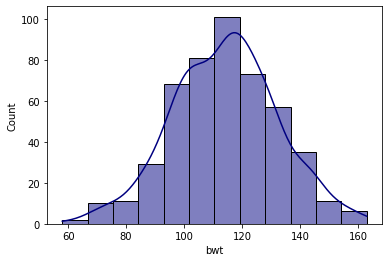

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data = df_cohutthuoc,x = 'bwt',color = 'navy',kde = True, bins=12)

**Vị trí tập trung dữ liệu**: khoảng 110

**Tính biến động của dữ liệu**: dữ liệu phân bố trong khoảng [50-170]

**Tính đối xứng của phân bố dữ liệu**: dữ liệu chỉ có 1 đỉnh. Bắt đầu từ đỉnh, hai bên giảm dầnvà tốc độ giảm vừa phải.

Dữ liệu phân bố gần đối xứng, hơi lệch về phía trái. Hai bên đuôi có độ dài vừa phải. Hai bên đỉnh dữ liệu cũng phân bố vừa phải.

**Giá trị ngoại lệ**: không thấy rõ có giá trị ngoại lệ nào đáng kể

b) Histogram trong trường hợp bà mẹ không hút thuốc:

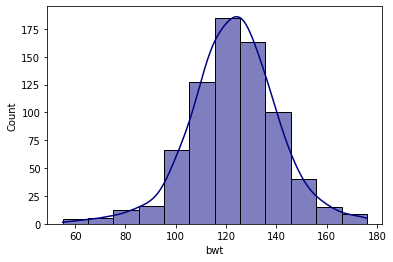

In [ ]:
sns.histplot(data = df_khonghutthuoc,x = 'bwt',color = 'navy',kde = True, bins=12)

**Vị trí tập trung dữ liệu**: khoảng 120

**Tính biến động của dữ liệu**: dữ liệu phân bố trong khoảng [50-170]

**Tính đối xứng của phân bố dữ liệu**: dữ liệu chỉ có 1 đỉnh. Bắt đầu từ đỉnh, hai bên giảm dầnvà tốc độ giảm vừa phải.

Dữ liệu phân bố gần đối xứng, không lệch về phía nào. Hai bên đuôi có độ dài vừa phải. Hai bên đỉnh dữ liệu cũng phân bố vừa phải.

**Giá trị ngoại lệ**: 180

c) Boxplot trong trường hợp bà mẹ có hút thuốc: 

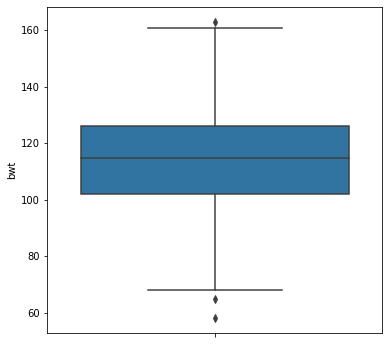

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(y=df_cohutthuoc['bwt'])

**Tính biến động của dữ liệu**: dữ liệu phân bố tập trung trong khoảng từ [102,126]

**Giá trị ngoại lệ**: có một số giá trị ngoại lệ (lớn hơn 162, nhỏ hơn 66) nhưng không nhiều

d) Boxplot trong trường hợp bà mẹ không hút thuốc: 

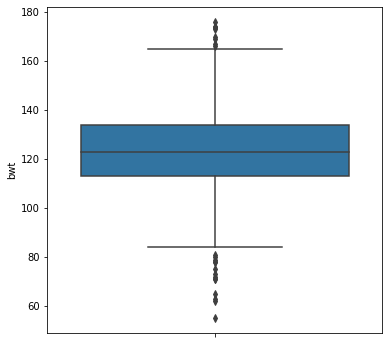

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(y=df_khonghutthuoc['bwt'])

**Tính biến động của dữ liệu**: dữ liệu phân bố tập trung trong khoảng từ [113,134]

**Giá trị ngoại lệ**: có một số giá trị ngoại lệ (lớn hơn 168, nhỏ hơn 83)

2. Dữ liệu cân nặng của trẻ trong trường hợp bà mẹ hút và thuốc không hút thuốc

a) Histogram

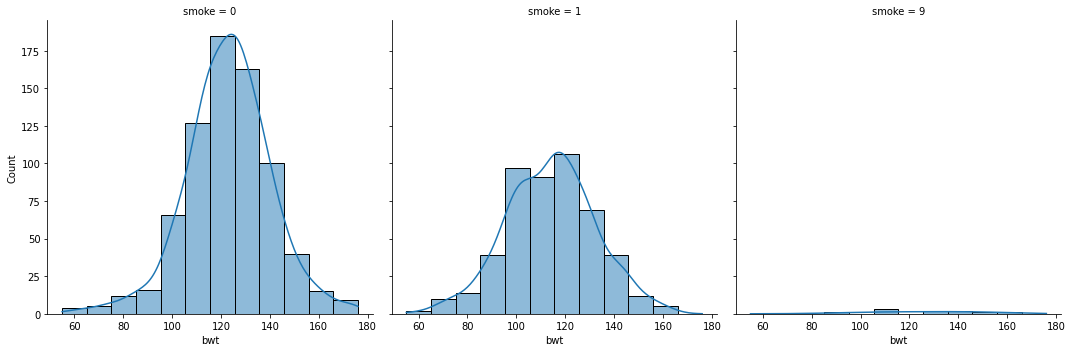

In [ ]:
sns.displot(df, x="bwt", col="smoke", kde=True,bins=12)

**Nhận xét**:

Cân nặng của trẻ trẻ trong trường hợp bà mẹ không hút thuốc cáo hơn so với trường hợp bà mẹ có hút thuốc.

**Tính biến thiên của 2 tập dữ liệu**: tương tự nhau

**Tính đối xứng của 2 tập dữ liệu**: tương tự nhau

**Giá trị ngoại lệ**: cả 2 đều không có giá trị ngoại lệ đáng chú ý.


b) Boxplot

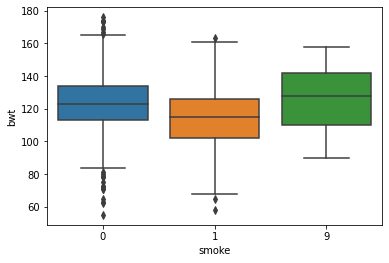

In [ ]:
sns.boxplot(x="smoke", y="bwt", data=df)

**Khác biệt về vị trí**: giá trị trung vị của trường hợp bà mẹ không hút thuốc lớn hơn trường hợp bà mẹ có hút thuốc (123 và 115).(Trường hợp smoke=9 là trường hợp không biết bà mẹ có hút thuốc hay không, trung vị trong trường hợp này cao hơn so với 2 trường hợp bà mẹ có hút thuốc và không hút thuốc).

**Giá trị ngoại lệ**: cả 2 trường hợp đều có giá trị ngoại lệ trên và dưới. Trường hợp không hút thuốc có nhiều giá trị ngoại lệ hơn.

Ta dùng thêm đồ thị QQ-plot để phân tích

So sánh QQ-plot phân bố của 2 tập dữ liệu:

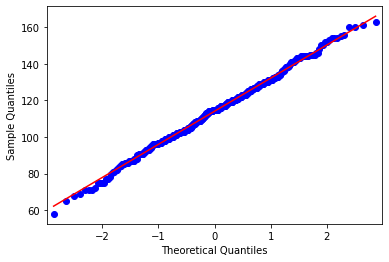

In [ ]:
from scipy.stats.stats import pearsonr
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
# QQ-plot phân bố của bà mẹ có hút thuốc
qqplot_cohutthuoc = qqplot(df_cohutthuoc['bwt'],line='s')
plt.show()

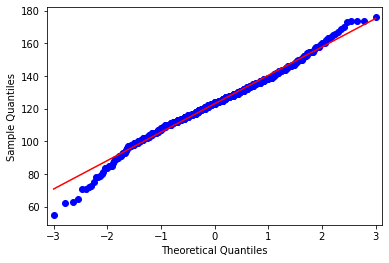

In [ ]:
# QQ-plot phân bố của bà mẹ không hút thuốc
qqplot_khonghutthuoc = qqplot(df_khonghutthuoc['bwt'],line='s')
plt.show()

**Nhận xét**:Dữ liệu của 2 trường hợp có phân bố tương tự nhau